In [46]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('googleplaystore.csv')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data['Size'] = data['Size'].map(lambda x: x.rstrip('M'))
data['Size'] = data['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
data['Size'] = data['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

In [5]:
data['Installs'] = data['Installs'].map(lambda x: x.rstrip('+'))
data['Installs'] = data['Installs'].map(lambda x: ''.join(x.split(',')))

In [7]:
avg_free_app_month_income = 500



In [6]:
data['Price'] = data['Price'].map(lambda x: x.lstrip('$').rstrip())

In [8]:
# Row 10472 removed due to missing value of Category
data.drop(data.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
data.drop(data.index[[7312,8266]], inplace=True)

In [9]:
data.sort_values("Category", inplace = True)

In [13]:
# Label encoding
lb_make = LabelEncoder()

In [14]:
# Create column for "numeric" Content Rating 
data["Content Rating NUM"] = lb_make.fit_transform(data["Content Rating"])

In [15]:
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}

In [16]:
data["Category NUM"] = lb_make.fit_transform(data["Category"])

In [18]:
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in data["Category"].unique():
    dict_category[i] = val
    val += 1

In [19]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
data['Rating'] = imputer.fit_transform(data[['Rating']])

# Rounding the mean value to 1 decimal place
data['Rating'].round(1)
data.dropna(axis=0, inplace=True)

In [20]:
# Change datatype
data['Reviews'] = pd.to_numeric(data['Reviews'])
data['Installs'] = pd.to_numeric(data['Installs'])
data['Price'] = pd.to_numeric(data['Price'])

In [23]:
# Pie chart for Category
value_category = np.zeros(33)
labels_category = data['Category'].unique()
for i in range(len(data['Category'])):
    try:
        value = data['Category'][i]
        num = dict_category[value]
        value_category[num] = value_category[num] + 1
    except:
        pass

In [28]:
# Free and paid counts for each category
free_paid_list = [] 
# 1st value = Free 
# 2nd value = Paid 
### Alternate values
for j in labels_category:
    free_count = 0
    paid_count = 0
    for i in range(len(data['Type'])):
        try:
            if data['Category'][i] == j:
                if data['Type'][i] == "Free":
                     free_count += 1
                if data['Type'][i] == "Paid":
                     paid_count += 1
        except:
            pass   
    free_paid_list.append(free_count)
    free_paid_list.append(paid_count)
    
    colors_free_paid = []
    free_color = "#00ff00" # GREEN color
    paid_color = "#0000ff" # BLUE color
    for i in range(int(len(free_paid_list)/2)):
        colors_free_paid.append(free_color)
        colors_free_paid.append(paid_color)



C:\Users\ki-an\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  import sys


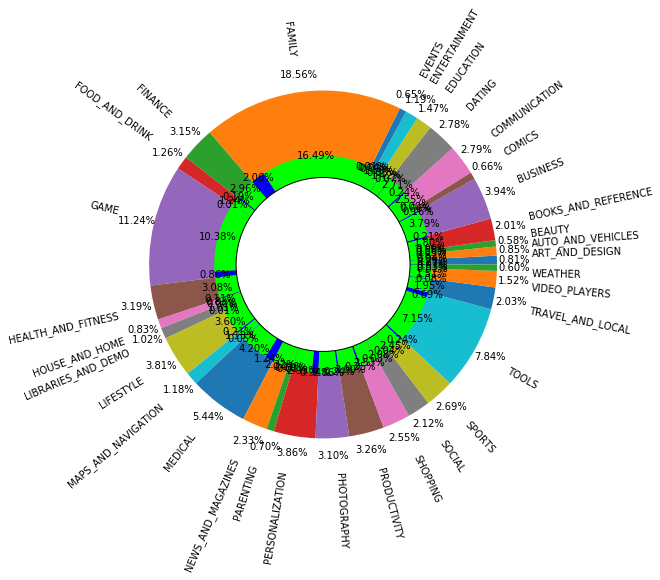

In [61]:
plt.axis("equal")
plt.pie(value_category, labels=labels_category, radius=2, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.pie(free_paid_list, colors=colors_free_paid, radius=1.25, autopct='%0.2f%%', pctdistance=1.0)
centre_circle = plt.Circle((0,0),1.0,color='black', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [52]:
# Get possible values for GAME and FAMILY in Genres
list_games_genres = []
list_family_genres = []
for i in range(len(data['Category'])):
    try:
        if data['Category'][i] == 'GAME':
            value = data['Genres'][i]
            if value not in list_games_genres:
                list_games_genres.append(value)
        if data['Category'][i] == 'FAMILY':
            value = data['Genres'][i]
            if value not in list_family_genres:
                list_family_genres.append(value)  
    except:
        pass

In [53]:
value_games = np.zeros(len(list_games_genres))
labels_games = sorted(list_games_genres)
value_family = np.zeros(len(list_family_genres))
labels_family = sorted(list_family_genres)

In [54]:
# Dictionary for games:
dict_games = {}
for i in range(len(labels_games)):
    dict_games[labels_games[i]] = i
    
# Dictionary for family
dict_family = {}
for i in range(len(labels_family)):
    dict_family[labels_family[i]] = i

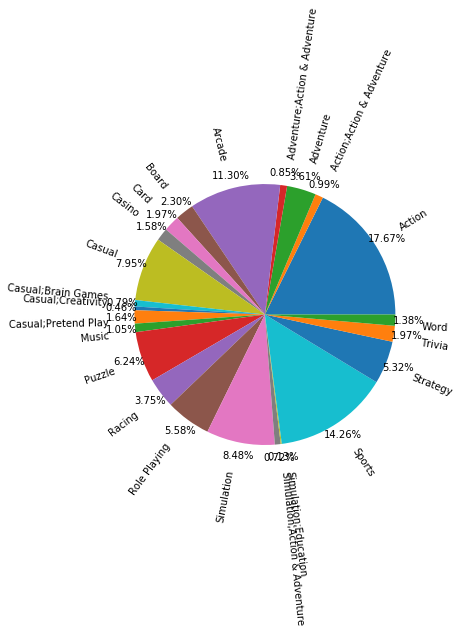

In [55]:
# Pie chart for GAME in Genres
for i in range(len(data['Genres'])):
    try:
        if data['Genres'][i] in labels_games:
            value = data['Genres'][i]
            num = dict_games[value]
            value_games[num] = value_games[num] + 1
    except:
        pass
plt.axis("equal")
plt.pie(value_games, labels=labels_games, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()


In [ ]:
fd